In [1]:
# Load the Libraries

import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout,BatchNormalization, Activation

In [2]:
import warnings
warnings.filterwarnings('ignore')

from pathlib import Path

In [3]:

## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("gdrive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('gdrive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

Mounted at /content/gdrive


In [5]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)

image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

In [6]:
# Setting up batch size and reshaping the image

batch_size = 32
img_height = 180
img_width = 180

In [7]:
## Write your train dataset here

train_ds = tf.keras.preprocessing.image_dataset_from_directory( data_dir_train,
                                                               seed=123,
                                                               validation_split=0.2,
                                                               subset="training",
                                                               image_size=(img_height, img_width),
                                                               batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [8]:
## Write your validation dataset here

val_ds = tf.keras.preprocessing.image_dataset_from_directory( data_dir_train,
                                                             seed=123,
                                                             validation_split=0.2,
                                                             subset="validation",
                                                             image_size=(img_height, img_width),
                                                             batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [9]:
# List out all the classes of skin cancer and store them in a list.

class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### visualize the data

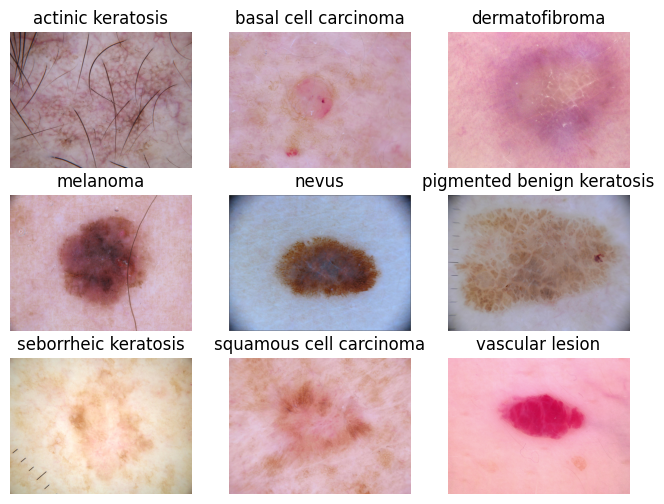

In [10]:
# An image from each class

plt.figure(figsize=(8,6))
j=1

for i in class_names:
  plt.subplot(3,3,j)
  image = plt.imread(list(data_dir_train.glob(f'{i}/*.jpg'))[1])
  plt.title(i)
  plt.imshow(image)
  plt.axis('off')
  j+=1

In [11]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Model Creation

In [12]:
model = keras.Sequential()

model.add(layers.Rescaling(1./255, input_shape=(img_height, img_width,3)))

model.add(Conv2D(32,kernel_size=(3,3), padding='same', activation='relu'))   # Convolution layer
model.add(MaxPooling2D(pool_size = (2, 2)))                                  # MaxPooling layer
model.add(Dropout(0.25))                                                     # Dropout layer

model.add(Conv2D(64,kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256,kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(9))
model.add(Activation('softmax'))

#### Model Compilation

In [13]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer='sgd', metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 90, 90, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 64)       0         
 2D)                                                    

#### Model Training

In [15]:
# Running the model for 20 epochs

batch_size = 32
epochs = 20

history = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/20
56/56 [==============================] - 695s 3s/step - loss: 2.0515 - accuracy: 0.2042 - val_loss: 2.1408 - val_accuracy: 0.2058
Epoch 2/20
56/56 [==============================] - 3s 58ms/step - loss: 2.0263 - accuracy: 0.2037 - val_loss: 2.1241 - val_accuracy: 0.2058
Epoch 3/20
56/56 [==============================] - 3s 57ms/step - loss: 2.0189 - accuracy: 0.2176 - val_loss: 2.1217 - val_accuracy: 0.3177
Epoch 4/20
56/56 [==============================] - 3s 57ms/step - loss: 2.0061 - accuracy: 0.2444 - val_loss: 2.1068 - val_accuracy: 0.2237
Epoch 5/20
56/56 [==============================] - 3s 59ms/step - loss: 1.9817 - accuracy: 0.2812 - val_loss: 2.0850 - val_accuracy: 0.2729
Epoch 6/20
56/56 [==============================] - 3s 57ms/step - loss: 1.9535 - accuracy: 0.2796 - val_loss: 2.0273 - val_accuracy: 0.3043
Epoch 7/20
56/56 [==============================] - 3s 57ms/step - loss: 1.9348 - accuracy: 0.2963 - val_loss: 2.0087 - val_accuracy: 0.3669
Epoch 8/20
56

Training_Accuracy = 39, loss = 1.68

Validation Accuracy = 33, loss = 1.87

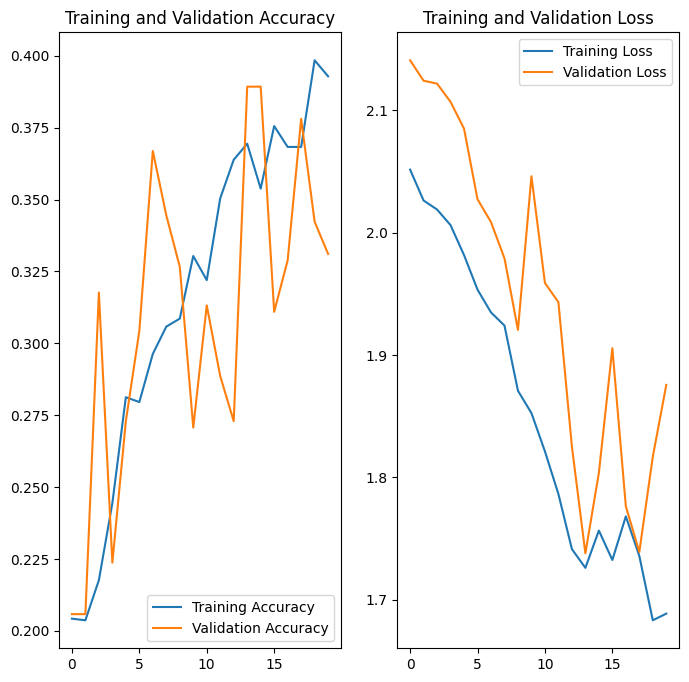

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

The model isn't a good fit. Accuracy is very low. Model is underfitting, as we can clearly see both the train and validation accuracies are very low.

### Using Data Augmentation

In [17]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.

data_augmentation = tf.keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical",
                                                 input_shape=(img_height,
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomZoom(0.2),
    layers.experimental.preprocessing.RandomContrast(0.2)
  ]
)

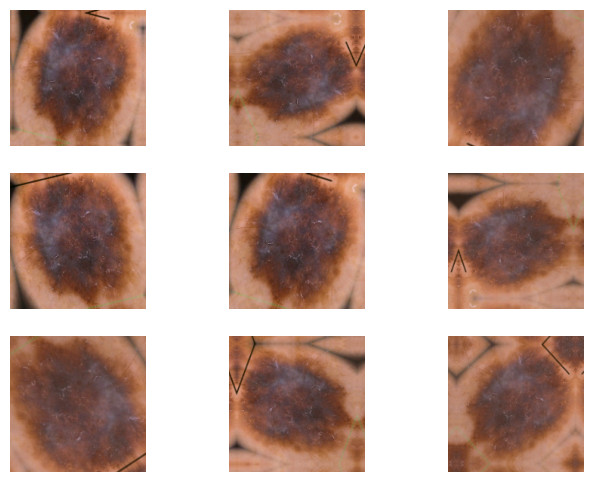

In [18]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
plt.figure(figsize=(8, 6))

for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [19]:
# Model creation after apply Data Augmentation

model = keras.Sequential()

model.add(layers.Rescaling(1./255, input_shape=(img_height, img_width,3)))

model.add(data_augmentation)

model.add(Conv2D(32,kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(32,kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256,kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(9))
model.add(Activation('softmax'))

In [20]:
model.compile(optimizer='sgd', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 180, 180, 32)      896       
                                                                 
 conv2d_6 (Conv2D)           (None, 180, 180, 32)      9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 90, 90, 32)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 90, 90, 32)        0         
                                                      

In [22]:
history = model.fit( train_ds, validation_data=val_ds, epochs=20, batch_size=batch_size)

Epoch 1/20
56/56 [==============================] - 9s 102ms/step - loss: 2.0668 - accuracy: 0.1747 - val_loss: 2.1232 - val_accuracy: 0.2058
Epoch 2/20
56/56 [==============================] - 5s 90ms/step - loss: 2.0327 - accuracy: 0.1842 - val_loss: 2.1213 - val_accuracy: 0.2058
Epoch 3/20
56/56 [==============================] - 5s 92ms/step - loss: 2.0277 - accuracy: 0.2020 - val_loss: 2.1094 - val_accuracy: 0.1924
Epoch 4/20
56/56 [==============================] - 5s 91ms/step - loss: 2.0189 - accuracy: 0.2026 - val_loss: 2.0985 - val_accuracy: 0.2058
Epoch 5/20
56/56 [==============================] - 5s 94ms/step - loss: 2.0180 - accuracy: 0.2081 - val_loss: 2.0960 - val_accuracy: 0.2036
Epoch 6/20
56/56 [==============================] - 5s 92ms/step - loss: 2.0152 - accuracy: 0.2104 - val_loss: 2.0972 - val_accuracy: 0.2058
Epoch 7/20
56/56 [==============================] - 5s 93ms/step - loss: 2.0128 - accuracy: 0.2154 - val_loss: 2.0864 - val_accuracy: 0.2058
Epoch 8/20
5

Training_Accuracy: 28%     loss: 1.9

Validation_accuracy: 23%     loss: 1.99

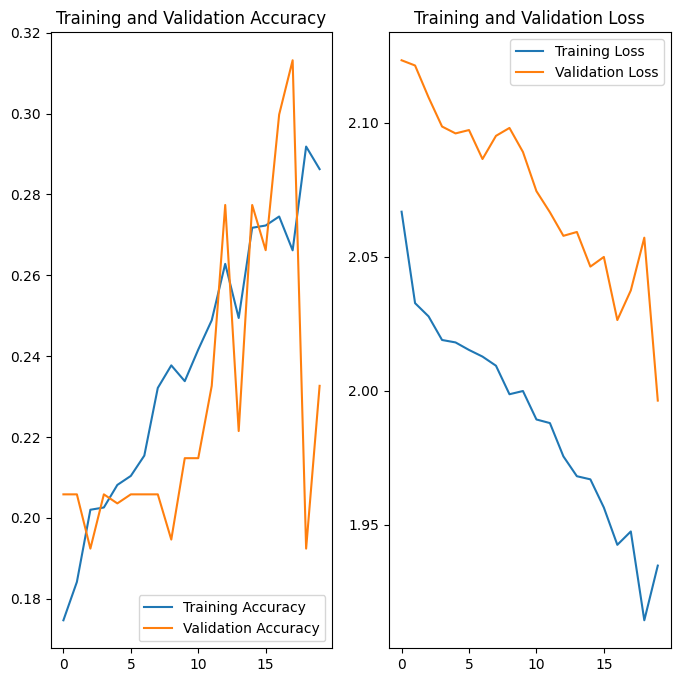

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


the model isn't a good fit.

### Class Distribution

In [24]:
class_count = pd.DataFrame()

for i in class_names:
    count = len(list(data_dir_train.glob(f'{i}/*.jpg')))
    class_count = class_count.append({'Class_name': i,
                                      'Image_Samples':count,
                                      'proportion':round(count/len(list(data_dir_train.glob('*/*.jpg'))),2)}, ignore_index=True)

class_count

,Class_name,Image_Samples,proportion
0,actinic keratosis,114,0.05
1,basal cell carcinoma,376,0.17
2,dermatofibroma,95,0.04
3,melanoma,438,0.20
4,nevus,357,0.16
5,pigmented benign keratosis,462,0.21
6,seborrheic keratosis,77,0.03
7,squamous cell carcinoma,181,0.08
8,vascular lesion,139,0.06


-- As we can see, samples with class 'Pigmented benign keratosis' are of 21% in the whole dataset followed by 'Melanoma' with 20% samples. There are 5 classes with bare very few samples in the dataset.

Class 'Nevus' has the least number of samples.

In [26]:
!pip install Augmentor

In [27]:
path_to_training_dataset="gdrive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
   p = Augmentor.Pipeline(path_to_training_dataset + i)
   p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
   p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to gdrive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F95F7E5CBB0>: 100%|██████████| 500/500 [00:25<00:00, 19.71 Samples/s]


Initialised with 376 image(s) found.
Output directory set to gdrive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F95F7DB92A0>: 100%|██████████| 500/500 [00:33<00:00, 14.91 Samples/s]


Initialised with 95 image(s) found.
Output directory set to gdrive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F95F7F4F580>: 100%|██████████| 500/500 [00:28<00:00, 17.72 Samples/s]


Initialised with 438 image(s) found.
Output directory set to gdrive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F95F7F4F8B0>: 100%|██████████| 500/500 [01:40<00:00,  4.99 Samples/s]


Initialised with 357 image(s) found.
Output directory set to gdrive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x7F95EA21A560>: 100%|██████████| 500/500 [01:29<00:00,  5.61 Samples/s]


Initialised with 462 image(s) found.
Output directory set to gdrive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F95F64101F0>: 100%|██████████| 500/500 [00:23<00:00, 21.52 Samples/s]


Initialised with 77 image(s) found.
Output directory set to gdrive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F96872CFD90>: 100%|██████████| 500/500 [00:46<00:00, 10.84 Samples/s]


Initialised with 181 image(s) found.
Output directory set to gdrive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F9687328280>: 100%|██████████| 500/500 [00:20<00:00, 23.95 Samples/s]


Initialised with 139 image(s) found.
Output directory set to gdrive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F95EA2979A0>: 100%|██████████| 500/500 [00:21<00:00, 23.68 Samples/s]


In [28]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Distribution of Augmented Data

In [31]:
from glob import glob

path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['gdrive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0026843.jpg_ba1e8260-9469-42e9-b7cc-2bb4c55ad516.jpg',
 'gdrive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0026794.jpg_48677195-5bb9-4b60-929f-62201b963a74.jpg',
 'gdrive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0027355.jpg_71d66319-a906-452b-9ee7-9b78d1d48b6a.jpg',
 'gdrive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0026607.jpg_64d7d7c2-a4ee-4cc3-91af-2a69259d2c29.jpg',
 'gdrive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output/pigmented benign

In [32]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmen

In [33]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))


In [34]:
df1 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])

df1.head()

,Path,Label
0,gdrive/My Drive/Skin cancer ISIC The Internati...,pigmented benign keratosis
1,gdrive/My Drive/Skin cancer ISIC The Internati...,pigmented benign keratosis
2,gdrive/My Drive/Skin cancer ISIC The Internati...,pigmented benign keratosis
3,gdrive/My Drive/Skin cancer ISIC The Internati...,pigmented benign keratosis
4,gdrive/My Drive/Skin cancer ISIC The Internati...,pigmented benign keratosis


In [35]:
org_path_list = [x for x in glob(os.path.join(data_dir_train, '*/*.jpg'))]


org_lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*/*.jpg'))]


org_dataframe_dict = dict(zip(org_path_list, org_lesion_list))



In [36]:
org_df = pd.DataFrame(list(org_dataframe_dict.items()),columns = ['Path','Label'])
org_df

,Path,Label
0,gdrive/My Drive/Skin cancer ISIC The Internati...,pigmented benign keratosis
1,gdrive/My Drive/Skin cancer ISIC The Internati...,pigmented benign keratosis
2,gdrive/My Drive/Skin cancer ISIC The Internati...,pigmented benign keratosis
3,gdrive/My Drive/Skin cancer ISIC The Internati...,pigmented benign keratosis
4,gdrive/My Drive/Skin cancer ISIC The Internati...,pigmented benign keratosis
...,...,...
2234,gdrive/My Drive/Skin cancer ISIC The Internati...,seborrheic keratosis
2235,gdrive/My Drive/Skin cancer ISIC The Internati...,seborrheic keratosis
2236,gdrive/My Drive/Skin cancer ISIC The Internati...,seborrheic keratosis
2237,gdrive/My Drive/Skin cancer ISIC The Internati...,seborrheic keratosis


In [37]:
final_df = org_df.append(df1)

In [38]:
final_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

-- The above code is to show how many images are present in each class for model training.

### Training the model on the data created using Augmentor

In [39]:
batch_size = 32
img_height = 180
img_width = 180

In [40]:
# Creating a training dataset

data_dir_train=r"gdrive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"

train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,
                                                               seed=123,
                                                               validation_split = 0.2,
                                                               subset = 'training',
                                                               image_size=(img_height, img_width),
                                                               batch_size=batch_size)


Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [41]:
# Creating a validation dataset

val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,
                                                             seed=123,
                                                             validation_split = 0.2,
                                                             subset = 'validation',
                                                             image_size=(img_height, img_width),
                                                             batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [42]:
model = tf.keras.Sequential()

model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(180,180,3)))

model.add(layers.Conv2D(32,kernel_size=(3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(layers.Conv2D(32,kernel_size=(3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(layers.Conv2D(64,kernel_size=(3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(layers.Conv2D(128,kernel_size=(3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(layers.Conv2D(256,kernel_size=(3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(len(class_names),activation='softmax'))

In [43]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer='sgd', metrics=['accuracy'])

In [44]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_11 (Conv2D)          (None, 180, 180, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 180, 180, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_12 (Conv2D)          (None, 180, 180, 32)      9248      
                                                                 
 batch_normalization_1 (Batc  (None, 180, 180, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 90, 90, 32)      

In [45]:
epochs = 30

history = model.fit(train_ds, validation_data=val_ds, epochs=epochs, batch_size=batch_size)

Epoch 1/30
169/169 [==============================] - 49s 259ms/step - loss: 2.2783 - accuracy: 0.1842 - val_loss: 2.7030 - val_accuracy: 0.1002
Epoch 2/30
169/169 [==============================] - 41s 235ms/step - loss: 1.8294 - accuracy: 0.3181 - val_loss: 2.6058 - val_accuracy: 0.1433
Epoch 3/30
169/169 [==============================] - 41s 236ms/step - loss: 1.7003 - accuracy: 0.3668 - val_loss: 1.8316 - val_accuracy: 0.3370
Epoch 4/30
169/169 [==============================] - 42s 240ms/step - loss: 1.6118 - accuracy: 0.3978 - val_loss: 2.0392 - val_accuracy: 0.2851
Epoch 5/30
169/169 [==============================] - 41s 236ms/step - loss: 1.5275 - accuracy: 0.4180 - val_loss: 1.8115 - val_accuracy: 0.4053
Epoch 6/30
169/169 [==============================] - 41s 236ms/step - loss: 1.4711 - accuracy: 0.4444 - val_loss: 2.5381 - val_accuracy: 0.2457
Epoch 7/30
169/169 [==============================] - 41s 236ms/step - loss: 1.4002 - accuracy: 0.4720 - val_loss: 1.5637 - val_ac

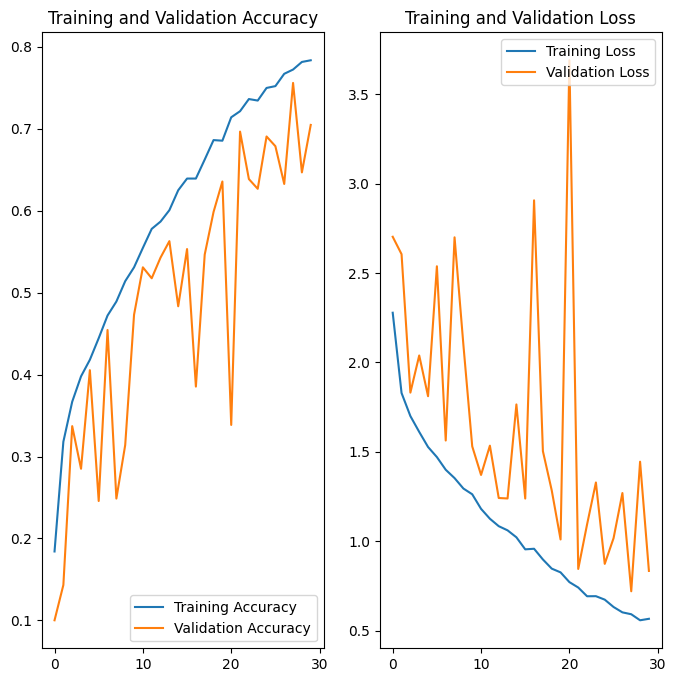

In [46]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


The Training accuracy has increased significantly.



In [ ]:
# We are using Adam as optimizer

In [47]:
model = tf.keras.Sequential()

model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(180,180,3)))

model.add(layers.Conv2D(32,kernel_size=(3,3), activation='relu' ))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))


model.add(layers.Conv2D(64,kernel_size=(3,3), activation='relu' ))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))


model.add(layers.Conv2D(128,kernel_size=(3,3), activation='relu' ))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))


model.add(layers.Conv2D(256,kernel_size=(3,3), activation='relu' ))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))


model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dropout(0.25))

model.add(layers.Dense(len(class_names),activation='softmax'))

In [48]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

In [49]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_16 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 batch_normalization_5 (Batc  (None, 178, 178, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 batch_normalization_6 (Batc  (None, 87, 87, 64)      

In [50]:
epochs=20

model.fit(train_ds, validation_data=val_ds, epochs=epochs, batch_size=batch_size)

Epoch 1/20
169/169 [==============================] - 45s 225ms/step - loss: 2.7652 - accuracy: 0.2146 - val_loss: 2.3437 - val_accuracy: 0.1151
Epoch 2/20
169/169 [==============================] - 41s 235ms/step - loss: 1.9488 - accuracy: 0.3006 - val_loss: 2.3050 - val_accuracy: 0.1344
Epoch 3/20
169/169 [==============================] - 41s 236ms/step - loss: 1.7314 - accuracy: 0.3522 - val_loss: 1.6257 - val_accuracy: 0.3756
Epoch 4/20
169/169 [==============================] - 37s 215ms/step - loss: 1.5874 - accuracy: 0.3965 - val_loss: 1.8010 - val_accuracy: 0.3088
Epoch 5/20
169/169 [==============================] - 41s 237ms/step - loss: 1.5097 - accuracy: 0.4273 - val_loss: 1.5275 - val_accuracy: 0.4180
Epoch 6/20
169/169 [==============================] - 40s 228ms/step - loss: 1.4637 - accuracy: 0.4447 - val_loss: 1.9707 - val_accuracy: 0.2866
Epoch 7/20
169/169 [==============================] - 38s 220ms/step - loss: 1.3727 - accuracy: 0.4718 - val_loss: 1.9192 - val_ac

In [62]:
model = tf.keras.Sequential()

model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(180,180,3)))

model.add(layers.Conv2D(32,kernel_size=(3,3), activation='relu' ))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(64,kernel_size=(3,3), activation='relu' ))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(128,kernel_size=(3,3), activation='relu' ))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(256,kernel_size=(3,3), activation='relu' ))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dropout(0.25))

model.add(layers.Dense(len(class_names),activation='softmax'))

In [63]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_7 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_30 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 43, 43, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 41, 41, 128)      

In [64]:
epochs=50

history = model.fit(train_ds, validation_data=val_ds, epochs=epochs, batch_size=batch_size)

Epoch 1/30
169/169 [==============================] - 39s 213ms/step - loss: 1.8765 - accuracy: 0.2767 - val_loss: 1.8950 - val_accuracy: 0.2880
Epoch 2/30
169/169 [==============================] - 40s 230ms/step - loss: 1.5484 - accuracy: 0.4002 - val_loss: 1.4177 - val_accuracy: 0.4432
Epoch 3/30
169/169 [==============================] - 36s 204ms/step - loss: 1.4426 - accuracy: 0.4347 - val_loss: 1.4179 - val_accuracy: 0.4633
Epoch 4/30
169/169 [==============================] - 39s 218ms/step - loss: 1.3803 - accuracy: 0.4585 - val_loss: 1.3406 - val_accuracy: 0.4922
Epoch 5/30
169/169 [==============================] - 37s 215ms/step - loss: 1.2625 - accuracy: 0.5035 - val_loss: 1.1915 - val_accuracy: 0.5449
Epoch 6/30
169/169 [==============================] - 40s 231ms/step - loss: 1.2193 - accuracy: 0.5367 - val_loss: 1.0975 - val_accuracy: 0.5694
Epoch 7/30
169/169 [==============================] - 41s 238ms/step - loss: 1.1277 - accuracy: 0.5688 - val_loss: 1.0231 - val_ac

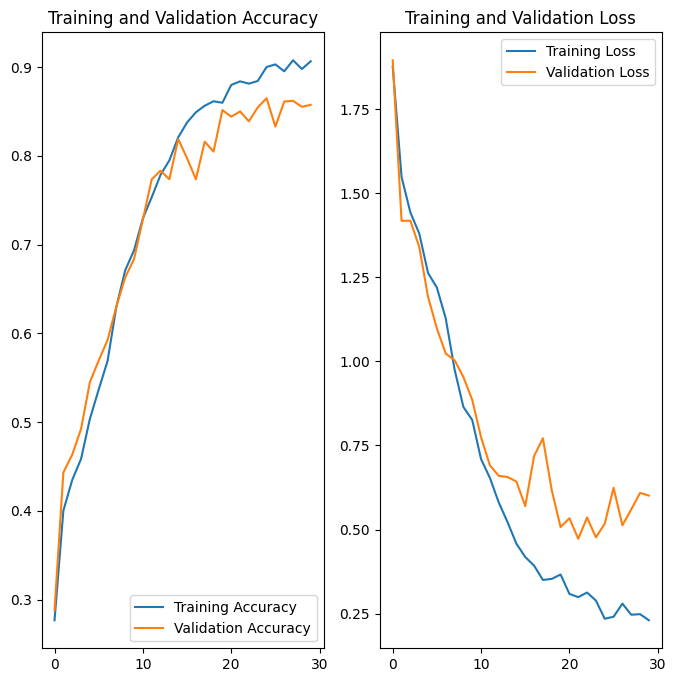

In [65]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

---------------------------------------
1. The Model has achieved good training as well as validation accuracy.
2. Both accuracies are close and is a sign of Good fit.
3. Use of Augmentor and dealing with Class Imbalance has helped in achieving better accuracies.